# 4. Random forest

Realicemos una predicción basada en un random forest. 
Se parte de los datos analizados, normalizados y acotados logrados en el punto 0, para el training.

Este método se basa en hacer una media de la predicción obtenida con  muchos decision trees y aún sin ajustes, suele funcionar bien.

Partiendo de una contrucción del modelo, haremos un proceso iterativo de validación y ajuste del mismo (modificando parámetros y variables), hasta obtener el que mejor predice nuestra target, sin infra o sobreajustes

## Importación de datos y selección de variables


In [1]:
#Librerías a usar

import pandas as pd
import numpy as np

#Importación de datos
melbourne_data = pd.read_csv("data/PreciosCasas/train_final.csv", sep='\t', encoding='utf-8') 

# print a summary of the data in Melbourne data
melbourne_data.describe()

,Unnamed: 0,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,728.805765,729.805765,56.877145,10460.434454,6.094715,5.576527,1971.194235,1984.818806,439.128346,46.645161,...,0.003432,0.082361,0.002059,0.868909,0.069321,0.002745,0.008236,0.013727,0.821551,0.084420
std,421.402158,421.402158,42.339638,9862.564977,1.376542,1.113638,30.190353,20.640669,432.964939,161.471529,...,0.058500,0.275008,0.045345,0.337616,0.254086,0.052342,0.090410,0.116395,0.383022,0.278112
min,0.000000,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,364.000000,365.000000,20.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,729.000000,730.000000,50.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,383.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.000000,1094.000000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1459.000000,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
#Vamos a ver que variables elegimos

print(melbourne_data.columns)

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=223)


Queremos prededir el precio, será nuestro target, para lo cual, cogeremos unas variables como pedictores

In [3]:
y= melbourne_data.SalePrice
print(y.head())
melbourne_predictors = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = melbourne_data[melbourne_predictors]
X.describe()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,10460.434454,1971.194235,1159.129032,345.560055,1.563487,2.866163,6.510638
std,9862.564977,30.190353,372.015864,435.505117,0.549961,0.816595,1.616384
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7540.000000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9473.000000,1972.000000,1086.000000,0.000000,2.000000,3.000000,6.000000
75%,11600.000000,2000.000000,1391.000000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,3228.000000,2065.000000,3.000000,8.000000,14.000000


## Implementación del modelo **Random Forest**

El Random forest, usa muchos trees, y hace una predicción media de cada tree componente. En general, ajusta mejor que un arrbol de decisión simple y funciona bien hasta con los parámetros base.

Para ser capaces de ir validando el modelo, lo separaremos en dos grupos, predictors and target. Lo haremos mediando un split con un número generaro aleatorio. Como queremos que todas las veces que ejecutemos el modelo nos salga lo mismo, estableceremos el argumento de random_state.


In [4]:
#Importación de librerías

from  sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


#Separamos los datos en dos grupos, 
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

0.134657777236


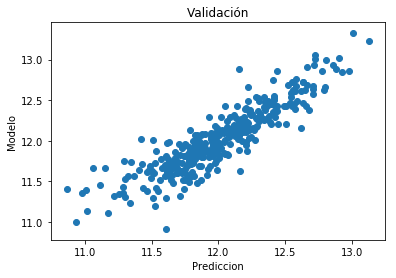

In [7]:
# Veamoslo en un scatter plot

import matplotlib.pyplot as plt

plt.scatter(melb_preds,val_y);
plt.title('Validación');
plt.ylabel('Modelo');
plt.xlabel('Prediccion');
plt.show()

# Mejora del modelo

Vamos a probar seleccionando otras variables


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#1) Limpiar datos, borrando valores perdidos

from sklearn.cross_validation import cross_val_score

melb_data= melbourne_data
melb_target = melbourne_data.SalePrice
melb_predictors = melbourne_data.drop(['SalePrice'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])



#funcion para calcular MAE
X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, 
                                                    melb_target,
                                                    test_size=0.3, 
                                                    random_state=0)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=60, max_depth=10, min_samples_split=10, random_state=29011982)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)



cols_with_missing = [col for col in X_train.columns 
                                 if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)

print (cols_with_missing)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

/root/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[]
Mean Absolute Error from dropping columns with Missing Values:
0.096529455609


In [9]:
reduced_X_train.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)

### Método de imputación 
Para trabajar con los datos vacíos hay varias opciones:
   - Eliminamos esas columnas (y perdemos datos, claro)
   - Hacemos imputaciones: ponermos un valor medio en esos "huecos" vacíos
   - Hacemos una imputación pero añadiendo además una columna que especifique que valores son reales, y cuales imputados

In [11]:
# Imputation

from sklearn.preprocessing import Imputer

my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)

#print(pd.DataFrame(imputed_X_train).sample (5))
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error from Imputation:
0.096529455609


In [12]:
type(X_train), type(imputed_X_train)  # como son tipos distintos no aplican las mismas propiedades

(pandas.core.frame.DataFrame, numpy.ndarray)

In [13]:
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns 
                                 if X_train[col].isnull().any())
for col in cols_with_missing:
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()

# Imputation
my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

Mean Absolute Error from Imputation while Track What Was Imputed:
0.096529455609
